# Data Preprocessing

# Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
df_raw=pd.read_csv(r"C:\Users\Satyam kumar\Downloads\Bengaluru_House_Data.csv")
df_raw.shape                  

(13320, 9)

In [9]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# 3. Exploratory Data Analysis

In [10]:
df = df_raw.copy() # get the copy of raw data
 
# get the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [11]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [12]:
# value count of each feature
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")
 

<Axes: >

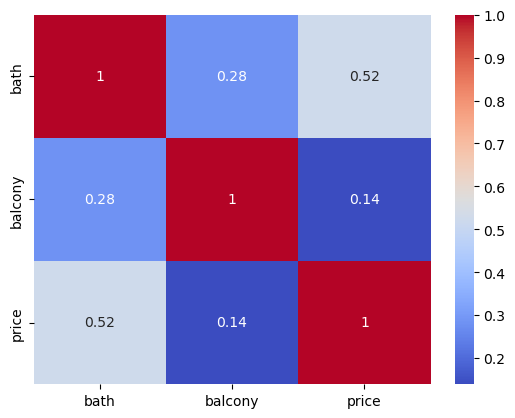

In [73]:
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)
# correlation of bath is greater than a balcony with price

# 4.Prepare data for Machine Learning Model

# Data Cleaning

In [15]:
df.isnull().sum() # To find how much missing data is available

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [16]:
df.isnull().mean()*100 # % of measing value

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [17]:
#society has 41.3% missing value (need to drop)

<Axes: >

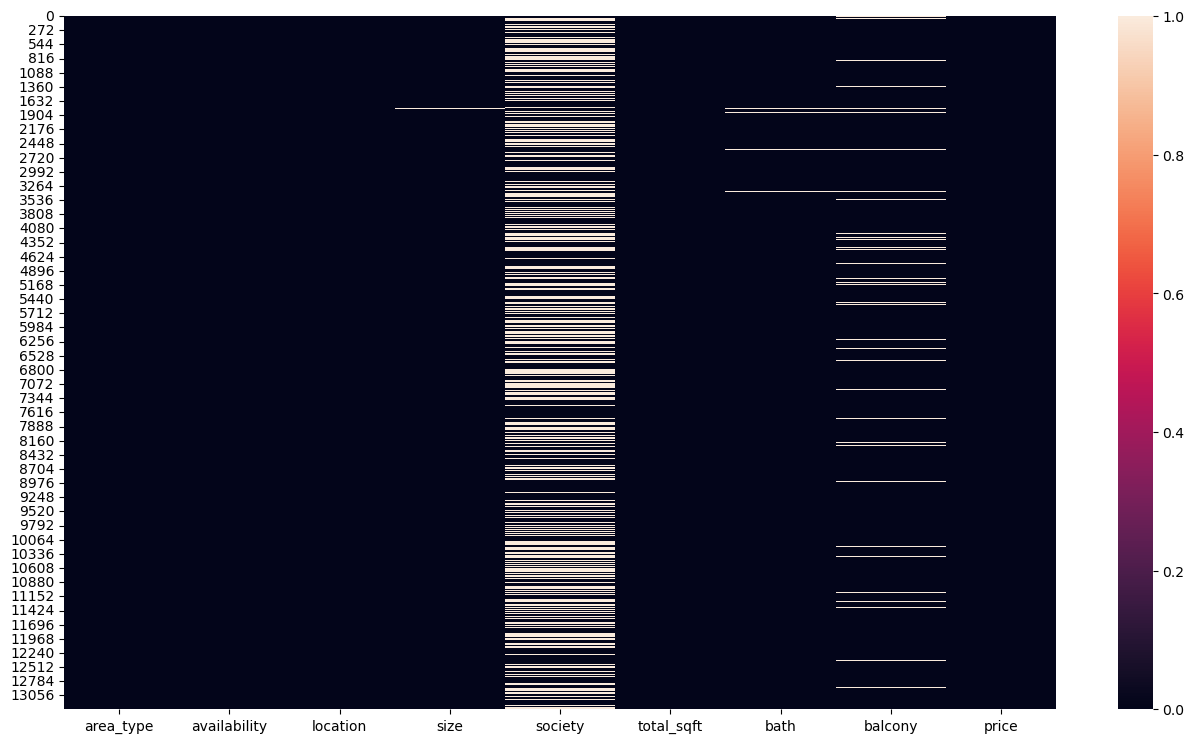

In [18]:
# visualize missing value using heatmap to get idea where is the value missing
 
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [19]:
# Drop ----------> society feature
# because 41.3% missing value
df2 = df.drop('society', axis='columns')

In [20]:
# fill mean value in --------> balcony feature
# because it contain 4.5% missing value
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [21]:
# drop na value rows from df2
# because there is very less % value missing
df3 = df2.dropna()
df3.shape

(13246, 8)

In [22]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

# 5.Feature Engineering

In [23]:
# to show all th ecolumns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [24]:
# here we observe that 'total_sqft' contain string value in diff format
## Converting 'total_sqft' cat feature in numeric

In [25]:
df3['total_sqft'].value_counts()

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1175                  48
1225                  48


In [26]:
# best strategy is to convert it into number by spliting it
total_sqft_int = []
for str_val in df3['total_sqft']:
  try:
    total_sqft_int.append(float(str_val)) # if '123.4' like this value in str then conver in float
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) # '123 - 534' this str value split and take mean
    except:
      total_sqft_int.append(np.nan) # if value not contain in above format then consider as nan
 

In [27]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [28]:
# reset the index of dataframe
df4 = df3.reset_index(drop=True) # drop=True - don't add index column in df
# join df4 and total_srft_int list
df5 = df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [29]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [30]:
# drop na value
df6 = df5.dropna()

# Working on  "Size"  feature

In [31]:
df6['size'].value_counts()

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [32]:
#2 BHK = 2 Bedroom == 2 RK
#so takes only number and remove sufix text

size_int = []
for str_val in df6['size']:
  temp=[]
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noice = ",str_val)
 
df6 = df6.reset_index(drop=True)
 
# join df6 and list size_int
df7 = df6.join(pd.DataFrame({'bhk':size_int}))

In [33]:
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2


# Finding Outlier and Removing

In [34]:
# function to create boxplot
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

******* bath *******


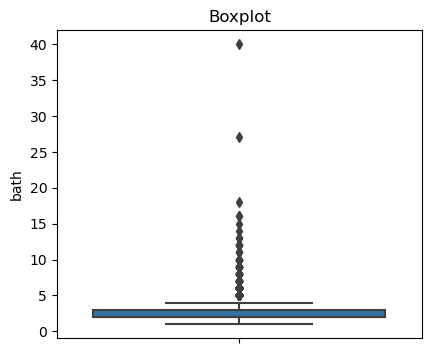

******* balcony *******


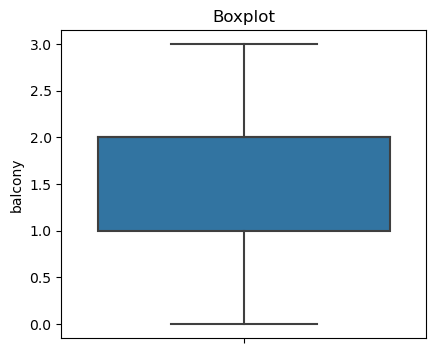

******* total_sqft_int *******


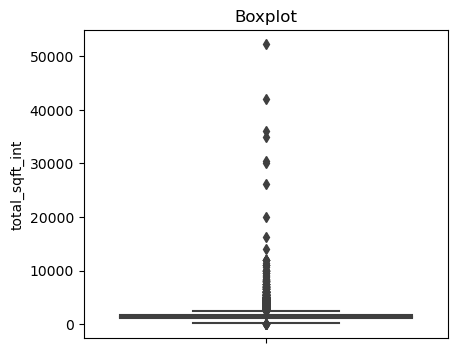

******* bhk *******


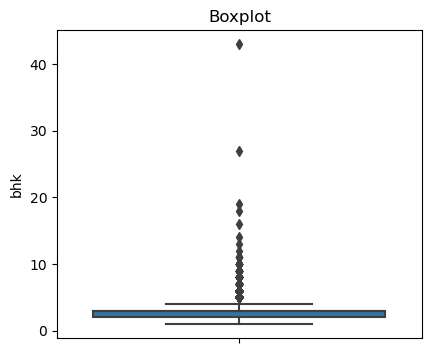

******* price *******


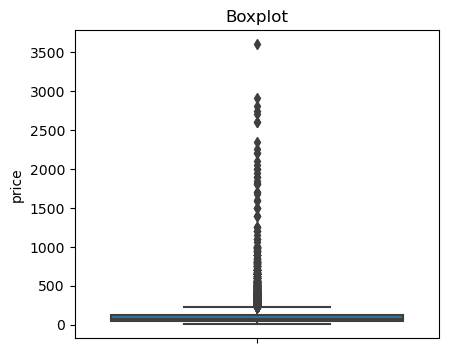

In [35]:
num_var = ["bath","balcony","total_sqft_int","bhk","price"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df7, var)

In [36]:
# if 1 BHK total_sqft are < 350 then we ae going to remove them
df8 = df7[~(df7['total_sqft_int']/df7['bhk'] < 350)]
df8.shape

(12106, 10)

In [37]:
# create new feature that is price per squre foot 
# it help to find the outliers
 
#price in lakh so conver into rupee and then / by total_sqft_int
df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']  
df8.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [38]:
df8.price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
# Removing outliers using help of 'price per sqrt'  taking std and mean per location
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out
 
df9 = remove_pps_outliers(df8)

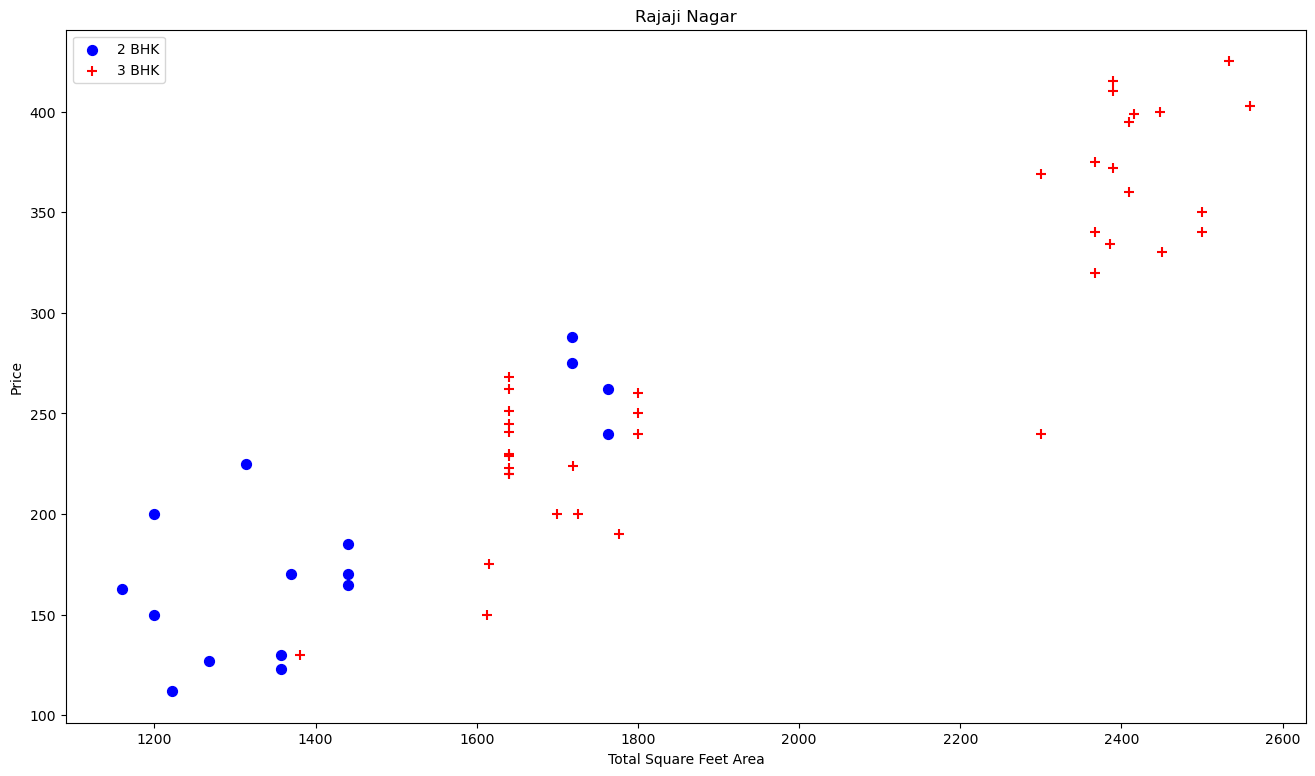

In [40]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()
 
plot_scatter_chart(df9, "Rajaji Nagar")

In [41]:
# in below scatterplot we observe that at same location price of
# 2 bhk house is greater than 3 bhk so it is outlier

def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

df10 = remove_bhk_outliers(df9)

In [42]:
# Remove outliers using the help of 'bath' feature"""
df10.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6.,  7., 12.])

In [43]:
# here we are considering data only total no. bathroom =  bhk + 1
df11 = df10[df10.bath < df10.bhk+2]

# Categorical Variable Encoding

In [44]:
df13 = df11.drop(["size","total_sqft"], axis =1)
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667


In [45]:
df14 = pd.get_dummies(df13, drop_first=True, columns=['area_type','availability','location'])
df14.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jul,availability_16-Mar,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,availability_19-Jan,availability_19-Jul,availability_19-Jun,availability_19-Mar,availability_19-May,availability_19-Oct,availability_19-Sep,availability_20-Apr,availability_20-Aug,availability_20-Dec,availability_20-Jan,availability_20-Jun,availability_20-Mar,availability_20-May,availability_20-Nov,availability_20-Oct,availability_20-Sep,availability_21-Dec,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ south,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Amarjyothi Colony,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Anugrah Layout,location_Anwar Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashok Nagar,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BEL Road,location_BEML Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Baba Nagar,location_Babusapalaya,location_Badavala Nagar,location_Bag

In [46]:
df14.shape

(7120, 820)

In [47]:
#In ['area_type','availability','location'] contain multiple classe and if we convert them into ONE so it increase
#the size of DF so try to use those classes which are *frequently* present in the car var

In [48]:
# Working with [area type] Feature
df13['area_type'].value_counts()

Super built-up  Area    5345
Built-up  Area          1298
Plot  Area               441
Carpet  Area              36
Name: area_type, dtype: int64

In [49]:
df15 = df13.copy()
# appy Ohe-Hot  encoding on 'area_type' feature
for cat_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
  df15["area_type"+cat_var] = np.where(df15['area_type']==cat_var, 1,0)
df15.shape

(7120, 12)

In [50]:
df15.head(2)

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0


In [51]:
# Working with [availability] Feature
df15["availability"].value_counts()

Ready To Move    5644
18-Dec            159
18-May            156
18-Apr            154
18-Aug            118
19-Dec            101
18-Jul             76
18-Mar             72
21-Dec             55
20-Dec             54
18-Jun             51
19-Mar             48
18-Feb             36
18-Nov             26
18-Oct             24
19-Jun             24
19-Jan             19
20-Jan             18
18-Sep             18
18-Jan             17
17-Dec             14
17-Oct             13
21-Mar             13
21-Jun             13
19-Sep             12
19-Aug             11
19-Jul             11
17-Jul             10
21-Jan             10
17-Jun              9
19-Apr              9
22-Dec              7
19-Oct              7
20-Jun              7
17-May              6
21-Jul              6
20-Aug              6
17-Sep              6
20-Oct              6
20-Sep              5
21-Feb              5
21-Oct              4
20-Nov              4
17-Nov              4
17-Apr              4
22-Jan    

In [52]:
# in availability feature, 5644 house 'Ready to Move" and remaining will be redy on perticuler date
# so we crate new feature ""availability_Ready To Move"" and add vale 1 if availability is Ready To Move else 0
df15["availability_Ready To Move"] = np.where(df15["availability"]=="Ready To Move",1,0)
df15.shape

(7120, 13)

In [53]:
df15.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1


In [54]:
# Working on [Location] feature
location_value_count = df15['location'].value_counts()
location_value_count

Whitefield                             234
Sarjapur  Road                         183
Electronic City                        158
Marathahalli                           116
Raja Rajeshwari Nagar                  116
Haralur Road                           116
Hennur Road                            108
Bannerghatta Road                      108
Uttarahalli                            106
Thanisandra                            103
Electronic City Phase II                89
Hebbal                                  87
Yelahanka                               86
7th Phase JP Nagar                      86
Kanakpura Road                          85
KR Puram                                61
Sarjapur                                56
Rajaji Nagar                            55
Bellandur                               53
Kasavanhalli                            53
Begur Road                              51
Banashankari                            49
Kothanur                                49
Hormavu    

In [55]:
location_gert_20 = location_value_count[location_value_count>=20].index
location_gert_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Marathahalli',
       'Raja Rajeshwari Nagar', 'Haralur Road', 'Hennur Road',
       'Bannerghatta Road', 'Uttarahalli', 'Thanisandra',
       'Electronic City Phase II', 'Hebbal', 'Yelahanka', '7th Phase JP Nagar',
       'Kanakpura Road', 'KR Puram', 'Sarjapur', 'Rajaji Nagar', 'Bellandur',
       'Kasavanhalli', 'Begur Road', 'Banashankari', 'Kothanur', 'Hormavu',
       'Harlur', 'Akshaya Nagar', 'Electronics City Phase 1', 'Jakkur',
       'Varthur', 'HSR Layout', 'Hennur', 'Ramamurthy Nagar', 'Chandapura',
       'Koramangala', 'Kaggadasapura', 'Kundalahalli', 'Ramagondanahalli',
       'Budigere', 'Hulimavu', 'Hoodi', 'Malleshwaram', 'Hegde Nagar',
       'Yeshwanthpur', 'Gottigere', '8th Phase JP Nagar', 'JP Nagar',
       'Channasandra', 'Bisuvanahalli', 'Vittasandra', 'Indira Nagar',
       'Old Airport Road', 'Sahakara Nagar', 'Brookefield', 'Kengeri',
       'Hosa Road', 'Vijayanagar', 'Balagere', 'Green Glen Layout

In [56]:
# location count is greter than 19 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)
df16 = df15.copy()
for cat_var in location_gert_20:
  df16['location_'+cat_var]=np.where(df16['location']==cat_var, 1,0)
df16.shape

(7120, 111)

In [57]:
# Drop categorical variable"""
 
df17 = df16.drop(["area_type","availability",'location'], axis =1)
df17.shape
 
df17.head()
 

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Electronics City Phase 1,location_Jakkur,location_Varthur,location_HSR Layout,location_Hennur,location_Ramamurthy Nagar,location_Chandapura,location_Koramangala,location_Kaggadasapura,location_Kundalahalli,location_Ramagondanahalli,location_Budigere,location_Hulimavu,location_Hoodi,location_Malleshwaram,location_Hegde Nagar,location_Yeshwanthpur,location_Gottigere,location_8th Phase JP Nagar,location_JP Nagar,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Old Airport Road,location_Sahakara Nagar,location_Brookefield,location_Kengeri,location_Hosa Road,location_Vijayanagar,location_Balagere,location_Green Glen Layout,location_Bommasandra,location_Rachenahalli,location_Panathur,location_Old Madras Road,location_Kudlu Gate,location_Mysore Road,location_Thigalarapalya,location_Talaghattapura,location_Kadugodi,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Frazer Town,location_Kanakapura,location_Attibele,location_Dodda Nekkundi,location_Devanahalli,location_Lakshminarayana Pura,location_Nagarbhavi,location_5th Phase JP Nagar,location_TC Palaya,location_Ananth Nagar,location_Anekal,location_Kudlu,location_CV Raman Nagar,location_Jalahalli,location_Kengeri Satellite Town,location_Doddathoguru,location_Bhoganhalli,location_Subramanyapura,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_Hosur Road,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Domlur,location_Horamavu Banaswadi,location_Tumkur Road,location_Mahadevpura
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
df17.to_csv(r"C:\Users\Satyam kumar\Downloads\ohe_data_reduce_cat_class.csv", index=False)

# Machine Learning Model Training and Testing & Save

In [59]:
df = pd.read_csv(r"C:\Users\Satyam kumar\Downloads\ohe_data_reduce_cat_class.csv")
df.shape

(7120, 108)

In [60]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Electronics City Phase 1,location_Jakkur,location_Varthur,location_HSR Layout,location_Hennur,location_Ramamurthy Nagar,location_Chandapura,location_Koramangala,location_Kaggadasapura,location_Kundalahalli,location_Ramagondanahalli,location_Budigere,location_Hulimavu,location_Hoodi,location_Malleshwaram,location_Hegde Nagar,location_Yeshwanthpur,location_Gottigere,location_8th Phase JP Nagar,location_JP Nagar,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Old Airport Road,location_Sahakara Nagar,location_Brookefield,location_Kengeri,location_Hosa Road,location_Vijayanagar,location_Balagere,location_Green Glen Layout,location_Bommasandra,location_Rachenahalli,location_Panathur,location_Old Madras Road,location_Kudlu Gate,location_Mysore Road,location_Thigalarapalya,location_Talaghattapura,location_Kadugodi,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Frazer Town,location_Kanakapura,location_Attibele,location_Dodda Nekkundi,location_Devanahalli,location_Lakshminarayana Pura,location_Nagarbhavi,location_5th Phase JP Nagar,location_TC Palaya,location_Ananth Nagar,location_Anekal,location_Kudlu,location_CV Raman Nagar,location_Jalahalli,location_Kengeri Satellite Town,location_Doddathoguru,location_Bhoganhalli,location_Subramanyapura,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_Hosur Road,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Domlur,location_Horamavu Banaswadi,location_Tumkur Road,location_Mahadevpura
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Split Dataset in train and test

In [61]:
X = df.drop("price", axis=1)
y = df['price']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (7120, 107)
Shape of y =  (7120,)


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5696, 107)
Shape of y_train =  (5696,)
Shape of X_test =  (1424, 107)
Shape of y_test =  (1424,)


# Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [65]:
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [66]:
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) # with all num var 0.7842744111909903
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.7903837092682253, 64.89843531105605)

In [67]:
# Lasso 
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test) # with balcony 0.5162364637824872
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.8036372973672522, 62.813242204691534)

# Support Vector Machine

In [68]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test) # with 0.2630802200711362
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.2063803584082815, 126.27806378079056)

# Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test) # with 0.8863376025408044
rfr_score

0.8945671152917465

In [70]:
rfr.predict(X_test)

array([ 79.349  ,  39.8983 , 119.65   , ...,  32.99755,  63.3253 ,
       178.82   ])

In [71]:
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score, "RMSE":lr_rmse},
              {'Model': 'Lasso','Score':lr_lasso_score, "RMSE":lr_lasso_rmse},
              {'Model': 'Support Vector Machine','Score':svr_score, "RMSE":svr_rmse},
              {'Model': 'Random Forest','Score':rfr_score, "RMSE":rfr_rmse}],
                   columns=['Model','Score','RMSE']))

NameError: name 'rfr_rmse' is not defined

# Test Model

In [ ]:
list(X.columns)
 
# it help to get predicted value of hosue  by providing features value 
def predict_house_price(model,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_type,availability,location):
 
  x =np.zeros(len(X.columns)) # create zero numpy array, len = 107 as input value for model
 
  # adding feature's value accorind to their column index
  x[0]=bath
  x[1]=balcony
  x[2]=total_sqft_int
  x[3]=bhk
  x[4]=price_per_sqft
 
  if "availability"=="Ready To Move":
    x[8]=1
 
  if 'area_type'+area_type in X.columns:
    area_type_index = np.where(X.columns=="area_type"+area_type)
    x[area_type_index] =1
 
  if 'location_'+location in X.columns:
    loc_index = np.where(X.columns=="location_"+location)
    x[loc_index] =1
 
  # feature scaling
  x = sc.transform([x])[0] # give 2d np array for feature scaling and get 1d scaled np array
 
  return model.predict([x])[0] # return the predicted value by train RandomRegressorModel model


# test sample

In [388]:
predict_house_price(model=rfr,bath=3,balcony=2,total_sqft_int=1672,bhk=3,price_per_sqft=8971.291866,area_type="Plot  Area",availability="Ready To Move",location="Devarabeesana Halli")

149.26